# Симуляция игр с целью выявления лучшей стратегии оставления первого лучшего хода

## Документация системы оценки для игры "Мафия"

### 1️⃣ Первое завещание

**Первое завещание** — это завещание, которое оставляет игрок, покидающий стол самым первым. Это может быть в случае, если он умирает ночью или если в стол ломается при 10 игроках. Важно, что завещание не зависит от того, в какой день или ночь это происходит, главное — что после ухода этого игрока продолжают игру 9 игроков. Также стоит отметить, что если два игрока уходят одновременно, правило первого завещания уже не действует.

#### Правила завещания

- Игрок может назвать цвета 3 или менее игроков.
- **При отстреле** первое завещание сохраняется до прощальной минуты.
- За каждый **верно названный красный цвет** игрок получает +0.2 балла.
- За каждый **верно названный черный цвет** игрок получает +0.3 балла.
- За **неверно названный цвет** игрок получает -0.1 балл.
- За **полное завещание** (в котором названы цвета всех 3 игроков) можно получить дополнительные баллы, которые суммируются в **+1 балл**.
- В **первом завещании** цвета игроков можно называть в любом порядке.
- **Шериф** также может назвать любые 3 цвета, но **не может называть цвета своих проверок**. В случае, если шериф назовет цвет своей проверки, он получит **0 баллов** за этот цвет. Однако, если шериф укажет **черную проверку**, он получит дополнительное **+0.2 балла**.

### Описание баллов

#### Правила начисления баллов:

1. **Верно названный красный цвет**: +0.2 балла.
2. **Верно названный черный цвет**: +0.3 балла.
3. **Неверно названный цвет**: -0.1 балла.
4. **Полное завещание** (все 3 цвета) дает **+1 балл**.
5. **Шериф** не может назвать цвета своих проверок, иначе получает 0 баллов за эту проверку.
6. **Шериф получает дополнительный балл** за черную проверку, если он назовет черного игрока.

#### Пример:

Предположим, игрок оставляет следующее завещание:
- 1, 10 красные игроки.
- 9 чёрный.

Если чёрными были игроки 3, 9, 10; то игрок получил бы
**0.2 - 0.1 + 0.3 = 0.4 балла**.

---

### Система оценки

Система оценки игры строится на анализе правильно угаданных цветов игроков и поощрении за полное завещание. Игроки, покидающие стол первыми, дают возможность остальным игрокам заработать баллы за их верные прогнозы. Эти баллы потом используются для анализа и сравнения стратегий.

---

### Как работает симуляция

Для симуляции игры и подсчета результатов применяется стратегия "ЛХ", которая подразумевает выбор случайных комбинаций игроков и анализ их цвета. В процессе симуляции мы рассчитываем средний балл для каждой стратегии и сравниваем их эффективность.

---

### Пример симуляции

1. **Настройки симуляции**:
   - Количество симуляций: 1,000,000
   - Количество игроков: 10
   - Количество красных игроков: 7
   - Количество черных игроков: 3
   - Стратегии для выбора:
     - 3 черных
     - 2 черных, 1 красный
     - 1 черный, 2 красных
     - 3 красных

2. **Результаты симуляции**:
   - Для каждой стратегии считается средний балл.
   - Для каждого игрока анализируется, сколько раз он угадал цвета правильно и неправильно.
   - Результаты выводятся в виде графиков и статистических анализов.

---

### Требования

Для работы с кодом и проведения симуляций необходимы следующие библиотеки:
- `numpy`
- `random`
- `scipy`
- `matplotlib`
- `seaborn`

---

### Как запустить симуляцию

1. Установите необходимые библиотеки:

    ```bash
    pip install numpy scipy matplotlib seaborn
    ```

2. Запустите код в вашем Python окружении. Результаты симуляции будут отображены в виде графиков и статистического вывода.

In [ ]:
NUM_SIMULATIONS = 1_000_000
NUM_PLAYERS = 10
NUM_RED, NUM_BLACK = 7, 3
STRATEGIES = [(3, 0), (2, 1), (1, 2), (0, 3), (2, 0), (1, 1), (0, 2), (1, 0), (0, 1)]

# Red player (Красный игрок, мирный житель)

In [ ]:
import numpy as np
import random
from scipy.stats import describe
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_score(LH, mafia_indices, red_indices):
    """
    Вычисление очков для стратегии.

    Параметры:
        LH (tuple): Выбранные игроки (мафия, мирные жители).
        mafia_indices (array): Индексы игроков-мафии.
        red_indices (array): Индексы мирных жителей.

    Возвращает:
        float: Очки за стратегию.
    """
    score = 0
    correct_blacks = sum(player in mafia_indices for player in LH[0])
    correct_reds = sum(player in red_indices for player in LH[1])

    score += correct_blacks * 0.3 - (len(LH[0]) - correct_blacks) * 0.1
    score += correct_reds * 0.2 - (len(LH[1]) - correct_reds) * 0.1

    if correct_blacks == 3:  # Бонус за нахождение всей мафии
        score = 1

    return round(score, 1)

# Симуляция игры
results = {strategy: [] for strategy in STRATEGIES}

for _ in range(NUM_SIMULATIONS):
    players = np.arange(NUM_PLAYERS)
    mafia_indices = np.random.choice(players, NUM_BLACK, replace=False)
    red_indices = np.setdiff1d(players, mafia_indices)
    killed_red = random.choice(red_indices)

    chosen_strategy = random.choice(STRATEGIES)
    num_chosen_blacks, num_chosen_reds = chosen_strategy

    available_for_black = players[players != killed_red]
    chosen_blacks = np.random.choice(available_for_black, num_chosen_blacks, replace=False)

    available_for_red = players[(players != killed_red) & (~np.isin(players, chosen_blacks))]
    chosen_reds = np.random.choice(available_for_red, num_chosen_reds, replace=False)

    LH = (list(chosen_blacks), list(chosen_reds))
    score = calculate_score(LH, mafia_indices, red_indices)
    results[chosen_strategy].append(score)

# Анализ статистики
for strategy, scores in results.items():
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    print(f"Стратегия {strategy}: Средний балл = {mean_score:.2f}, Стандартное отклонение = {std_dev:.2f}")


Стратегия (3, 0): Средний балл = 0.10, Стандартное отклонение = 0.29
Стратегия (2, 1): Средний балл = 0.17, Стандартное отклонение = 0.31
Стратегия (1, 2): Средний балл = 0.23, Стандартное отклонение = 0.29
Стратегия (0, 3): Средний балл = 0.30, Стандартное отклонение = 0.21
Стратегия (2, 0): Средний балл = 0.07, Стандартное отклонение = 0.25
Стратегия (1, 1): Средний балл = 0.13, Стандартное отклонение = 0.25
Стратегия (0, 2): Средний балл = 0.20, Стандартное отклонение = 0.19
Стратегия (1, 0): Средний балл = 0.03, Стандартное отклонение = 0.19
Стратегия (0, 1): Средний балл = 0.10, Стандартное отклонение = 0.14


<ipython-input-3-d24895b14038>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_means, y=strategy_labels, palette="viridis")


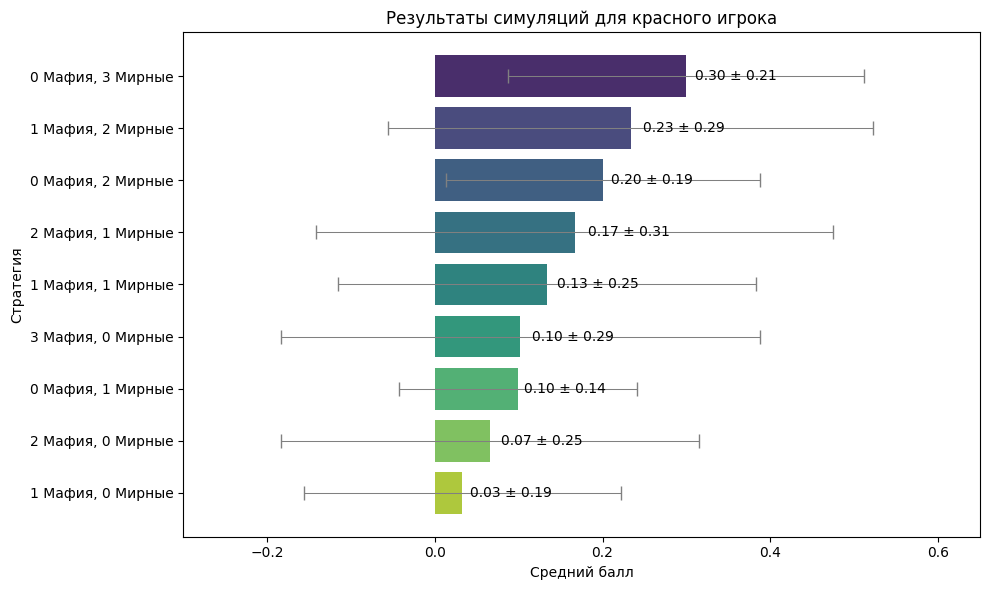

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results, title, x_min=-0.3, x_max=0.65):
    """
    Построение диаграммы результатов.

    Параметры:
        results (dict): Результаты симуляций.
        title (str): Заголовок диаграммы.
        x_min (float): Минимальное значение оси X.
        x_max (float): Максимальное значение оси X.
    """
    strategies = list(results.keys())
    means = [np.mean(scores) for scores in results.values()]
    std_devs = [np.std(scores) for scores in results.values()]

    sorted_indices = np.argsort(means)[::-1]
    sorted_strategies = [strategies[i] for i in sorted_indices]
    sorted_means = [means[i] for i in sorted_indices]
    sorted_std_devs = [std_devs[i] for i in sorted_indices]

    strategy_labels = [f"{strat[0]} Мафия, {strat[1]} Мирные" for strat in sorted_strategies]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_means, y=strategy_labels, palette="viridis")
    plt.errorbar(
        x=sorted_means,
        y=np.arange(len(sorted_means)),
        xerr=sorted_std_devs,
        fmt="none",
        ecolor="gray",
        capsize=5,
        elinewidth=0.75
    )

    for i, (mean, std) in enumerate(zip(sorted_means, sorted_std_devs)):
        plt.text(mean + std * 0.05, i, f"{mean:.2f} ± {std:.2f}", color="black", va="center")

    plt.xlabel("Средний балл")
    plt.ylabel("Стратегия")
    plt.xlim(x_min, x_max)
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_results(results, "Результаты симуляций для красного игрока")


## Заключение

Как мы видим, лучшей стратегией с вероятностной точки зрения является оставление 3 красных цветов. При этом среднеквадратическое отклонение примерно равно для всех стратегий, соответственно рисковать и использовать не лучшую стратегию имеет мало смысла, например в случае турнирной игры с целью обойти кого-либо.


# Sheriff (Шериф)

<ipython-input-3-d24895b14038>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_means, y=strategy_labels, palette="viridis")


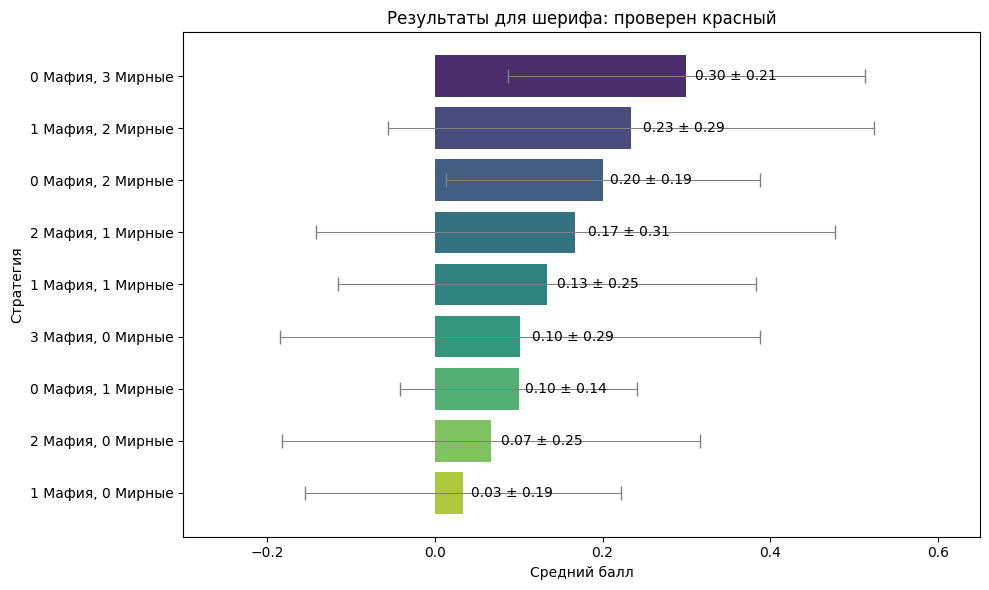

<ipython-input-3-d24895b14038>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_means, y=strategy_labels, palette="viridis")


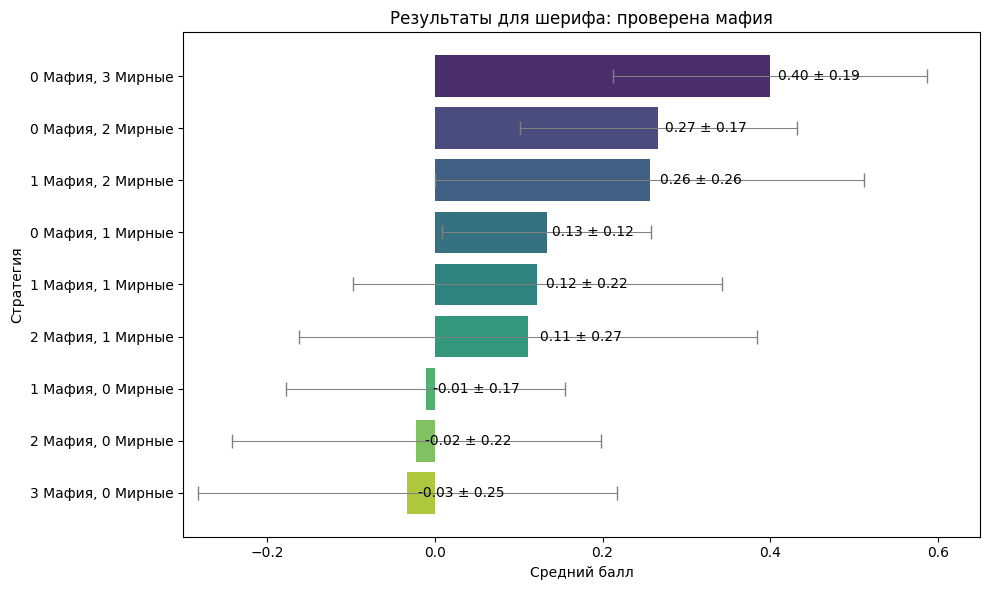

In [ ]:
def calculate_sheriff_score(LH, mafia_indices, red_indices, checked_player, checked_color):
    """
    Вычисление очков с учетом проверки шерифа.

    Параметры:
        LH (tuple): Выбранные игроки (мафия, мирные жители).
        mafia_indices (array): Индексы мафии.
        red_indices (array): Индексы мирных жителей.
        checked_player (int): Проверенный игрок.
        checked_color (str): Цвет проверенного игрока ("red" или "black").

    Возвращает:
        float: Очки за стратегию.
    """
    score = 0
    correct_blacks = sum(player in mafia_indices for player in LH[0] if player != checked_player)
    correct_reds = sum(player in red_indices for player in LH[1] if player != checked_player)

    score += correct_blacks * 0.3 - (len(LH[0]) - correct_blacks) * 0.1
    score += correct_reds * 0.2 - (len(LH[1]) - correct_reds) * 0.1

    if correct_blacks == 3:  # Бонус за нахождение всей мафии
        score = 1

    return round(score, 1)

# Симуляция для шерифа
results_red = {strategy: [] for strategy in STRATEGIES}
results_black = {strategy: [] for strategy in STRATEGIES}

for _ in range(NUM_SIMULATIONS):
    players = np.arange(NUM_PLAYERS)
    mafia_indices = np.random.choice(players, NUM_BLACK, replace=False)
    red_indices = np.setdiff1d(players, mafia_indices)

    sheriff = random.choice(players)
    checked_player = random.choice(players[players != sheriff])
    checked_color = "black" if checked_player in mafia_indices else "red"

    available_for_LH = players[(players != sheriff) & (players != checked_player)]

    for strategy in STRATEGIES:
        chosen_blacks = np.random.choice(available_for_LH, strategy[0], replace=False)
        chosen_reds = np.random.choice(np.setdiff1d(available_for_LH, chosen_blacks), strategy[1], replace=False)
        LH = (list(chosen_blacks), list(chosen_reds))
        score = calculate_sheriff_score(LH, mafia_indices, red_indices, checked_player, checked_color)

        if checked_color == "red":
            results_red[strategy].append(score)
        else:
            results_black[strategy].append(score)

plot_results(results_red, "Результаты для шерифа: проверен красный")
plot_results(results_black, "Результаты для шерифа: проверена мафия")


# Возможные улучшения
Можно ли считать все распределения нормальными? В любом случае, ожидаемое количество баллов не зависит от типа распределения.

Для шерифа может иметь смысл специально искать чёрную или красную проверку. Но учитывая, что чёрная проверка даст +0.2, специально стараться сделать красную проверку смысла нет. Однако, в реальной игре руль красной проверке может быть полезнее
